# --------------------------------------------------------------------------------
 
 <h1 style="color:blue;">  Adham Howaidy </h1>
 <h1 style="color:blue;">  DATA 4950 Spring 2024 Capstone Project </h1>
 
# --------------------------------------------------------------------------------

### Importing the Necessary Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

import datetime as dt
from datetime import timedelta

from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from lifelines import KaplanMeierFitter
lc = LabelEncoder()

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

from sklearn.pipeline import make_pipeline, Pipeline

from numpy import arange
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.kernel_ridge import KernelRidge
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc, plot_roc_curve

# Trick to widen the screen
from IPython.core.display import display, HTML

#Widens the code landscape 
display(HTML("<style>.container { width:95% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows', 50)
sns.set_style('whitegrid')

### Importing the CSV file

In [3]:
# Read the CSV file
df = pd.read_csv('tmdb_movies_data.csv')

print("Columns:")
print(df.columns)

print("\nFirst few rows:")
print(df.head())

Columns:
Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

First few rows:
       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce 

#### This will give us an idea of how many columns we have in this dataset and the data types of each column

In [34]:
df.info()

print("\nStatistics:")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### Let's see if there's any missing values

In [13]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


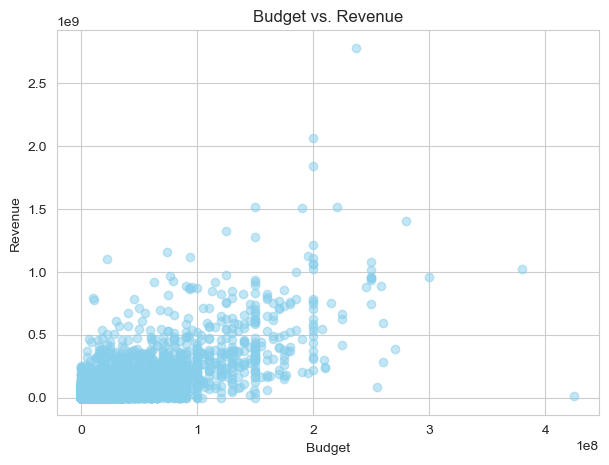

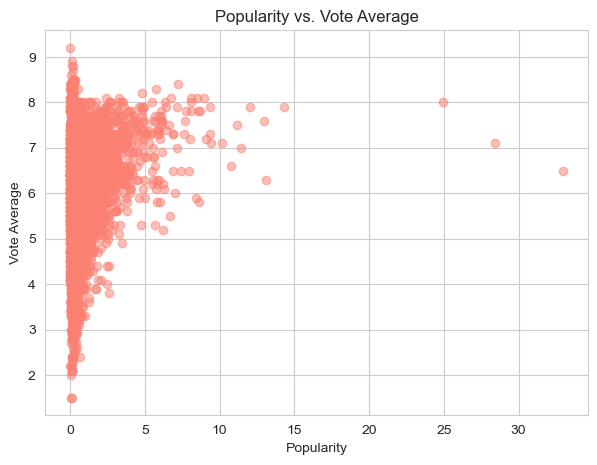

In [35]:
# Let's do some scatter plots to determine some factors

# Budget versus Revenue
plt.figure(figsize=(7, 5))
plt.scatter(df['budget'], df['revenue'], color='skyblue', alpha=0.5)
plt.title('Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

# Popularity versus Vote Average
plt.figure(figsize=(7, 5))
plt.scatter(df['popularity'], df['vote_average'], color='salmon', alpha=0.5)
plt.title('Popularity vs. Vote Average')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.grid(True)
plt.show()

# Some Notes about the scatterplots

* According to the budget v. revenue plot. We can conclude that in this dataset that most of these movies don't have a very high budget but at the same time don't have a high revenue either.

* According to the popularity v. vote average plot. We can conclude that in this dataset that most movies don't have high popularity and as the popularity increases, the number of movies decrease.

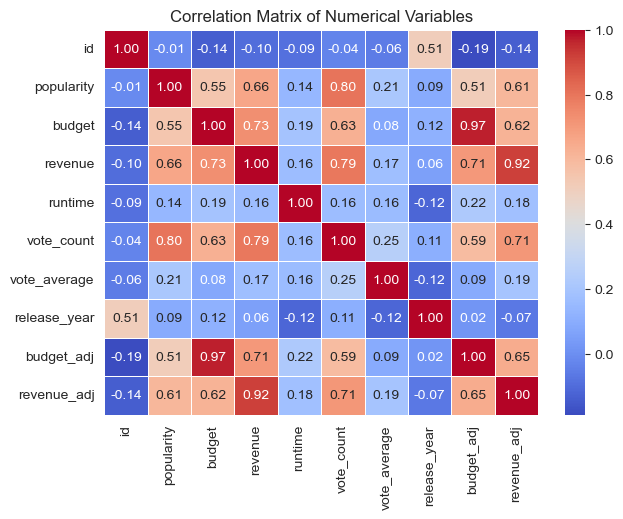

In [41]:
# Making a heatmap to see any type of correlations is easier than making plots and guessing which variables 
# correlate with each other

correlation_matrix = df.corr()

plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

## Pointing out variables that have a strong correlation in this heatmap

* Correlation between Budget and Revenue: A correlation of 0.73 between budget and revenue shows a strong correlation, and what this means is that movies with higher budgets tend to generate higher revenues. This could be due to multiple factors such as higher-budget movies being able to afford bigger-name actors, more extensive marketing campaigns, or more impressive special effects (like CGI for example), all of which could attract larger audiences and thus generate higher revenues.

* Correlation between Budget and Revenue_adj: The correlation of 0.97 between budget and revenue_adj is very close to 1, which indicates a very strong positive relationship. The “revenue_adj” variable represents the revenue adjusted for inflation, and the strong correlation suggests that even when accounting for inflation, higher-budget movies tend to generate higher revenues.

In [7]:
# Getting dummies for genre column, concatenate the original dataframe with the new genre columns, and then
# calculate the correlation matrix to determine any correlation between budget, revenue, and each genre

genres = df['genres'].str.get_dummies(sep='|')
df = pd.concat([df, genres], axis=1)
correlation_matrix = df[['budget', 'revenue'] + genres.columns.tolist()].corr()
genre_correlation = correlation_matrix.loc[['budget', 'revenue'], genres.columns]

print("Correlation between budget, revenue, and each genre:")
print(genre_correlation)

Correlation between budget, revenue, and each genre:
           Action    Action    Action  Adventure  Adventure  Adventure  \
budget   0.224786  0.224786  0.224786   0.293366   0.293366   0.293366   
revenue  0.149308  0.149308  0.149308   0.247953   0.247953   0.247953   

         Animation  Animation  Animation    Comedy    Comedy    Comedy  \
budget    0.072389   0.072389   0.072389 -0.031455 -0.031455 -0.031455   
revenue   0.079409   0.079409   0.079409 -0.014378 -0.014378 -0.014378   

            Crime     Crime     Crime  Documentary  Documentary  Documentary  \
budget   0.037208  0.037208  0.037208    -0.101888    -0.101888    -0.101888   
revenue  0.008113  0.008113  0.008113    -0.072398    -0.072398    -0.072398   

            Drama     Drama     Drama    Family    Family    Family   Fantasy  \
budget  -0.078310 -0.078310 -0.078310  0.100989  0.100989  0.100989  0.176550   
revenue -0.079985 -0.079985 -0.079985  0.099626  0.099626  0.099626  0.146498   

          Fantas

* According to this correlation chart, we can see that many genres had a higher budget than revenue which means that they ultimately failed. We can see that some genres' revenue had the same amount or a bit higher than the budget which means it wasn't a mainline success but at least covered the costs.

In [36]:
# Dropping rows that have any missing values/data

df_cleaned = df.dropna()
print("Shape of cleaned DataFrame:", df_cleaned.shape)

Shape of cleaned DataFrame: (1446, 22)


## Classification tree

In [61]:
# X variables are the features while y is the target variable
X = df_cleaned[['budget', 'popularity', 'runtime']]
y = df_cleaned['revenue']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.16040100250626566
              precision    recall  f1-score   support

           0       0.65      0.61      0.63       105
         134       0.00      0.00      0.00         1
        1378       0.00      0.00      0.00         1
        5980       0.00      0.00      0.00         1
        7205       0.00      0.00      0.00         0
        7306       0.00      0.00      0.00         0
       13684       0.00      0.00      0.00         0
       14870       0.00      0.00      0.00         1
       14947       0.00      0.00      0.00         0
       15071       0.00      0.00      0.00         1
       18097       0.00      0.00      0.00         1
       30905       0.00      0.00      0.00         1
       32251       0.00      0.00      0.00         1
       44348       0.00      0.00      0.00         0
       46474       0.00      0.00      0.00         1
       54947       0.00      0.00      0.00         1
       55125       0.00      0.00      0.00        

In [62]:
# Same thing here, just adding parameters to futher improve the accuracy

X = df_cleaned[['budget', 'popularity', 'runtime']]
y = df_cleaned['revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


print("Best Hyperparameters:", grid_search.best_params_)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.86      0.51       105
          46       0.00      0.00      0.00         0
         134       0.00      0.00      0.00         1
        1378       0.00      0.00      0.00         1
        5980       0.00      0.00      0.00         1
       14870       0.00      0.00      0.00         1
       15071       0.00      0.00      0.00         1
       18097       0.00      0.00      0.00         1
       30905       0.00      0.00      0.00         1
       32251       0.00      0.00      0.00         1
       46474       0.00      0.00      0.00         1
       48390       0.00      0.00      0.00         0
       54947       0.00      0.00      0.00         1
       55125       0.00      0.00      0.00         0
       63931       0.00      0.00      0.00         1
       74918       0.00 

In [63]:
# Again, just tweaking the parameters to improve the accuracy of the model

rf_clf = RandomForestClassifier(random_state=42)
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(rf_clf, param_distributions, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

print("Best Hyperparameters:", random_search.best_params_)
best_rf_clf = random_search.best_estimator_
y_pred_rf = best_rf_clf.predict(X_test)

print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.37      0.94      0.53       105
         134       0.00      0.00      0.00         1
        1378       0.00      0.00      0.00         1
        5980       0.00      0.00      0.00         1
       14870       0.00      0.00      0.00         1
       15071       0.00      0.00      0.00         1
       18097       0.00      0.00      0.00         1
       30905       0.00      0.00      0.00         1
       32251       0.00      0.00      0.00         1
       46474       0.00      0.00      0.00         1
       54947       0.00      0.00      0.00         1
       63931       0.00      0.00      0.00         1
      100345       0.00      0.00      0.00         1
      143000       0.00      0.00      0.00         1
      143191       0.00      0.00      0.0

In [64]:
# Further imporving the model by changing up the parameters

param_distributions = {
    'n_estimators': [200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8, 16]
}

random_search = RandomizedSearchCV(rf_clf, param_distributions, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

best_rf_clf = random_search.best_estimator_
y_pred_rf = best_rf_clf.predict(X_test)

print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.35      0.97      0.51       105
         134       0.00      0.00      0.00         1
        1378       0.00      0.00      0.00         1
        5980       0.00      0.00      0.00         1
       14870       0.00      0.00      0.00         1
       15071       0.00      0.00      0.00         1
       18097       0.00      0.00      0.00         1
       30905       0.00      0.00      0.00         1
       32251       0.00      0.00      0.00         1
       46474       0.00      0.00      0.00         1
       54947       0.00      0.00      0.00         1
       63931       0.00      0.00      0.00         1
      100345       0.00      0.00      0.00         1
      143000       0.00      0.00      0.00         1
      143191       0.00      0.00      0.00         1
      157768       0.00      0.00      0.00         1
      173066       0.00      0.00      0.0

## Graphical Representation

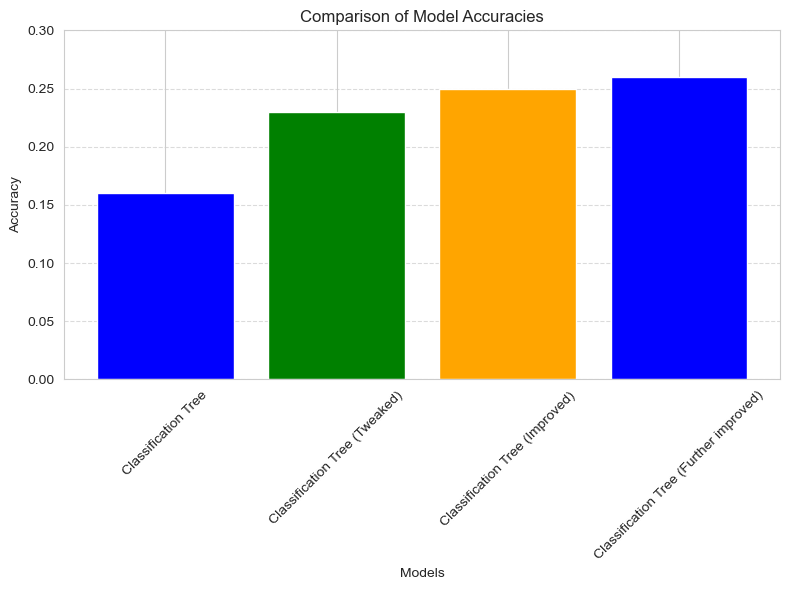

In [78]:
import matplotlib.pyplot as plt

accuracies = [0.16, 0.23, 0.25, 0.26]
models = ['Classification Tree', 'Classification Tree (Tweaked)', 'Classification Tree (Improved)', 'Classification Tree (Further improved)']

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])

# Title and Labels
plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Displaying the chart
plt.xticks(rotation = 45)
plt.ylim(0, 0.3)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Time to Failure Curve

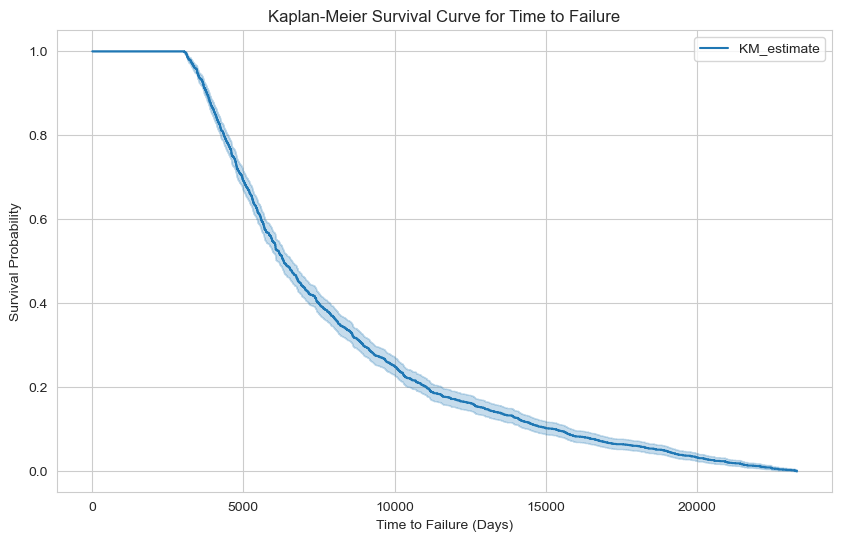

In [12]:
# Convert release_date to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

# Defining the failure criteria (in this case if budget surpasses revenue)
df['failure'] = 0  # 0 means that it's not a failure
df.loc[df['budget'] > df['revenue'], 'failure'] = 1  # 1 if budget > revenue

# Remove rows with missing time to failure values
df.dropna(subset=['release_date', 'budget', 'revenue'], inplace=True)

# Calculate time to failure (time until budget surpasses revenue)
df['time_to_failure'] = (pd.Timestamp.today() - df['release_date']).dt.days
df.loc[df['budget'] <= df['revenue'], 'time_to_failure'] = None

# Remove rows with missing time to failure values
df.dropna(subset=['time_to_failure'], inplace=True)

# Initialize Kaplan-Meier estimator
kmf = KaplanMeierFitter()

# Fit Kaplan-Meier curve
kmf.fit(df['time_to_failure'], event_observed=df['failure'])

# Plot Kaplan-Meier survival curve
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve for Time to Failure')
plt.xlabel('Time to Failure (Days)')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.show()

## Arima Forecasting Model

Test RMSE: 1584927402.0286655


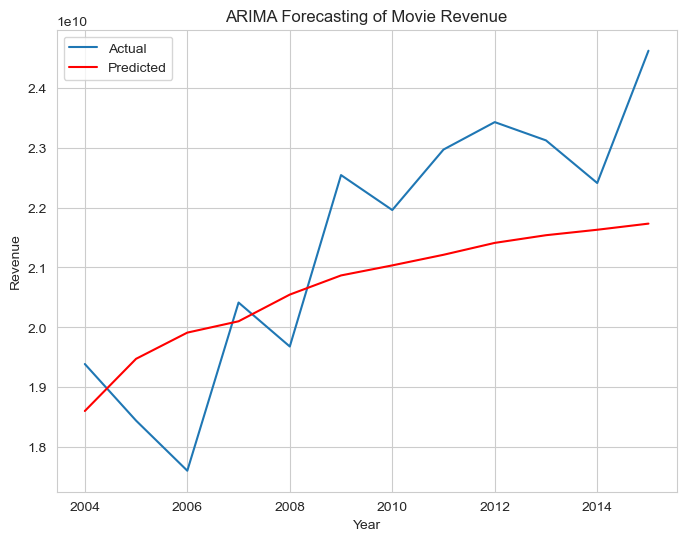

In [6]:
# Converting release_date to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

# Extracting year from release_date
df['release_year'] = df['release_date'].dt.year

# Group by release_year and sum revenue
revenue_yearly = df.groupby('release_year')['revenue_adj'].sum()

# Splitting the data into train and test sets
train_size = int(len(revenue_yearly) * 0.8)
train, test = revenue_yearly[:train_size], revenue_yearly[train_size:]

# Training the ARIMA model
model = ARIMA(train.values, order=(5,1,0))
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test))

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE:', rmse)

# Plot the results and curve
plt.figure(figsize=(8, 6))
plt.plot(test.index, test.values, label='Actual')
plt.plot(test.index, predictions, color='red', label='Predicted')
plt.title('ARIMA Forecasting of Movie Revenue')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.legend()
plt.show()

### Unfortunately, due to the bad accuracies of the Models, The numbers are way off like for instance, The RSME is 1,584,927,402 which is bad and an extrememly high number for root square mean error.